In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip"
!unzip -qo CNN_model_dataset.zip 
!rm CNN_model_dataset.zip

--2021-09-10 16:09:19--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.124
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170317173 (162M) [application/x-zip-compressed]
Saving to: ‘CNN_model_dataset.zip’

CNN_model_dataset.z 100%[===================>] 162.43M   325KB/s    in 4m 38s  

2021-09-10 16:13:58 (598 KB/s) - ‘CNN_model_dataset.zip’ saved [170317173/170317173]



In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

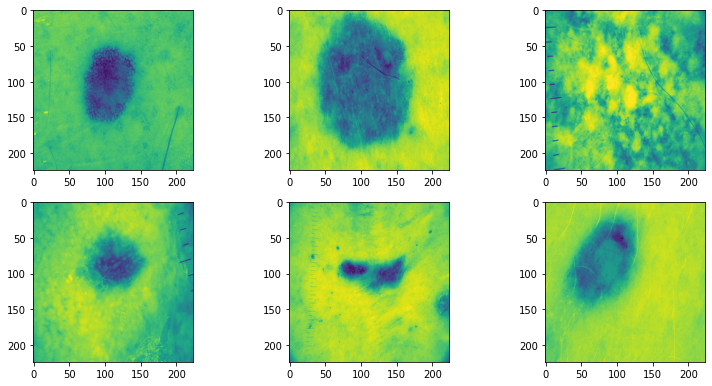

In [3]:
fig = plt.figure(figsize=(13, 10))

path = r'data/train/benign/100.jpg'
Image1 = cv2.imread(path,0)

path_1 = r'data/train/benign/1021.jpg'
Image2 = cv2.imread(path_1,0)

path_2 = r'data/train/malignant/19.jpg'
Image3 = cv2.imread(path_2,0)

path_3 = r'data/train/malignant/55.jpg'
Image4 = cv2.imread(path_3,0)

path_4 = r'data/test/benign/105.jpg'
Image5 = cv2.imread(path_4,0)

path_5 = r'data/test/benign/259.jpg'
Image6 = cv2.imread(path_5,0)

fig.add_subplot(3,3,1)
plt.imshow(Image1)
fig.add_subplot(3,3,2)
plt.imshow(Image2)
fig.add_subplot(3,3,3)
plt.imshow(Image3)
fig.add_subplot(3,3,4)
plt.imshow(Image4)
fig.add_subplot(3,3,5)
plt.imshow(Image5)
fig.add_subplot(3,3,6)
plt.imshow(Image6)


<h4> Rescaling </h4>

In [4]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [5]:
train='data/train/'

In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=2,
    subset='training',
    seed=50 )

Found 2637 files belonging to 2 classes.
Using 1978 files for training.


In [7]:
val='data/train/'

In [8]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=2,
    subset='validation',
    seed=50
    )

Found 2637 files belonging to 2 classes.
Using 659 files for validation.


In [9]:
test='data/test/'

In [10]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=2,
    seed=50
    )

Found 660 files belonging to 2 classes.


In [11]:
class_names = ['Benign', 'Malignant']

In [12]:
train_data.class_names = class_names
val_data.class_names = class_names

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense


<h4>Model Creation</h4>

In [14]:
model=Sequential()

In [15]:
#CNN Layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2, activation='softmax'))




In [16]:

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2

In [17]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
samples=2637
batch_size=2
new_values= samples//batch_size
value=print(new_values)
history = model.fit(
          train_data,
          steps_per_epoch = value,
          epochs=10,
          validation_data=val_data,
                             )

1318
Epoch 1/10
989/989 [==============================] - 254s 255ms/step - loss: 0.7049 - accuracy: 0.5349 - val_loss: 0.6940 - val_accuracy: 0.5311
Epoch 2/10
989/989 [==============================] - 253s 256ms/step - loss: 0.6909 - accuracy: 0.5511 - val_loss: 0.6943 - val_accuracy: 0.5311
Epoch 3/10
989/989 [==============================] - 251s 254ms/step - loss: 0.6890 - accuracy: 0.5511 - val_loss: 0.6940 - val_accuracy: 0.5311
Epoch 4/10
989/989 [==============================] - 251s 253ms/step - loss: 0.6889 - accuracy: 0.5511 - val_loss: 0.6933 - val_accuracy: 0.5311
Epoch 5/10
989/989 [==============================] - 252s 255ms/step - loss: 0.6887 - accuracy: 0.5511 - val_loss: 0.6940 - val_accuracy: 0.5311
Epoch 6/10
989/989 [==============================] - 252s 255ms/step - loss: 0.6889 - accuracy: 0.5511 - val_loss: 0.6932 - val_accuracy: 0.5311
Epoch 7/10
989/989 [==============================] - 256s 259ms/step - loss: 0.6888 - accuracy: 0.5511 - val_loss: 0.6

In [19]:
model.evaluate(val_data)

330/330 [==============================] - 27s 83ms/step - loss: 0.6931 - accuracy: 0.5311


[0.6930943727493286, 0.5311077237129211]

In [20]:
model.evaluate(test_data)

330/330 [==============================] - 30s 89ms/step - loss: 0.6895 - accuracy: 0.5455


[0.6895367503166199, 0.5454545617103577]

<h4> Model Saving </h4>

In [21]:
model.save("saved_model/cnn_model_skin1.h5")
model.save("saved_model/cnn_model_skin1_tf")

INFO:tensorflow:Assets written to: saved_model/cnn_model_skin1_tf/assets


<h4>Graph Plots </h4>

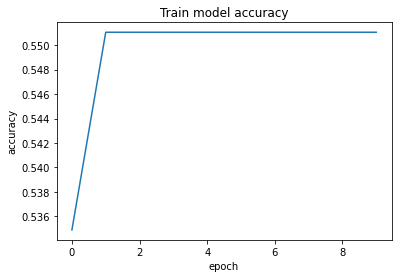

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

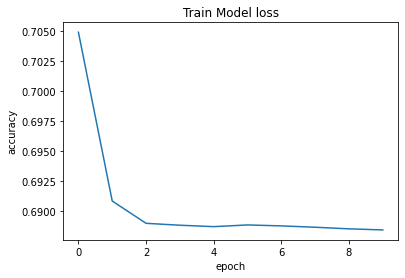

In [23]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

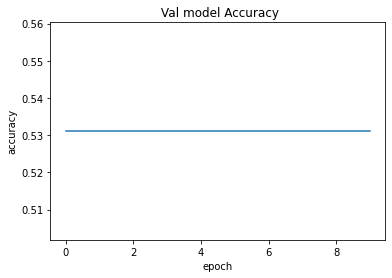

In [24]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

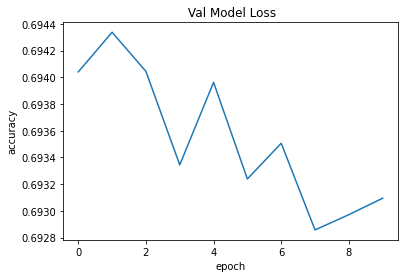

In [25]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

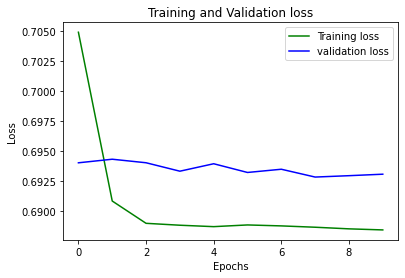

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

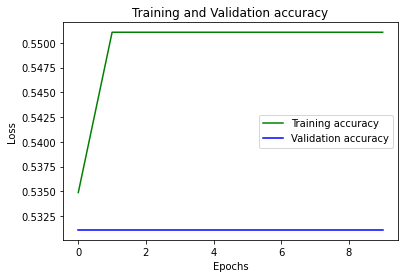

In [27]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### TFlite Conversion

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('saved_model/cnn_model_skin1.tflite', 'wb') as f:
    f.write(tflite_model)